# Import Libraries

In [69]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
#read the dataset
df = pd.read_csv("C:\\Cureya\\AAPL.csv")

In [71]:
#head of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-07-2020,91.279999,91.839996,90.977501,91.027496,90.418251,110737200
1,02-07-2020,91.962502,92.617500,90.910004,91.027496,90.418251,114041600
2,06-07-2020,92.500000,93.945000,92.467499,93.462502,92.836960,118655600
3,07-07-2020,93.852501,94.654999,93.057503,93.172501,92.548889,112424400
4,08-07-2020,94.180000,95.375000,94.089996,95.342499,94.704369,117092000


In [72]:
#tail of the dataset
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
266,22-07-2021,145.940002,148.199997,145.809998,146.800003,146.800003,77338200
267,23-07-2021,147.550003,148.720001,146.919998,148.559998,148.559998,71361600
268,26-07-2021,148.270004,149.830002,147.699997,148.990005,148.990005,72269700
269,27-07-2021,149.119995,149.210007,145.550003,146.770004,146.770004,103580300
270,28-07-2021,144.809998,146.970001,142.539993,144.979996,144.979996,118834300


In [73]:
#shape of dataset
df.shape

(271, 7)

In [74]:
#all the columns in dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [75]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       271 non-null    object 
 1   Open       271 non-null    float64
 2   High       271 non-null    float64
 3   Low        271 non-null    float64
 4   Close      271 non-null    float64
 5   Adj Close  271 non-null    float64
 6   Volume     271 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.9+ KB


In [77]:
# Drop NULL rows
df.dropna(inplace = True)

In [78]:
#checking the null vaues
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [79]:
#checking the duplicate vaues
df.duplicated().any()

False

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,271.0,1.233934e+02,1.235487e+01,9.098750e+01,1.163200e+02,1.245300e+02,1.319100e+02,1.492400e+02
High,271.0,1.248356e+02,1.232788e+01,9.184000e+01,1.176700e+02,1.258600e+02,1.332500e+02,1.500000e+02
Low,271.0,1.218018e+02,1.231367e+01,8.914500e+01,1.145900e+02,1.228600e+02,1.302200e+02,1.477000e+02
Close,271.0,1.233598e+02,1.234857e+01,9.102750e+01,1.160050e+02,1.247600e+02,1.319100e+02,1.491500e+02
Adj Close,271.0,1.230206e+02,1.250069e+01,9.041825e+01,1.156305e+02,1.243972e+02,1.315447e+02,1.491500e+02
Volume,271.0,1.182232e+08,5.196291e+07,4.669130e+07,8.373905e+07,1.043195e+08,1.417324e+08,3.743368e+08


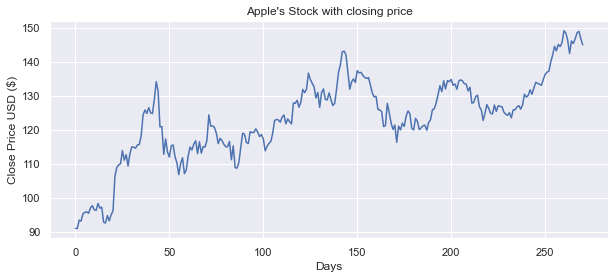

In [81]:
#plotting close price with days
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Apple's Stock with closing price")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.show()

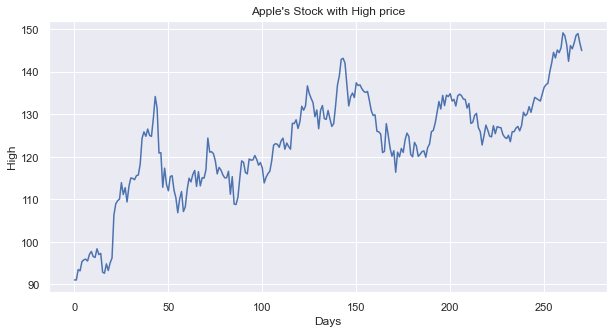

In [82]:
#plotting the graph with high stock in the day
df.Close.plot(figsize=(10,5)) 
plt.title("Apple's Stock with High price")
plt.ylabel("High")
plt.xlabel("Days")
plt.show()

Text(0.5, 1.0, 'Apple Cumulative Returns')

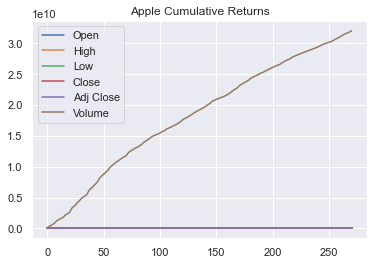

In [83]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('Apple Cumulative Returns')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'APPLE Autocorrelation plot')

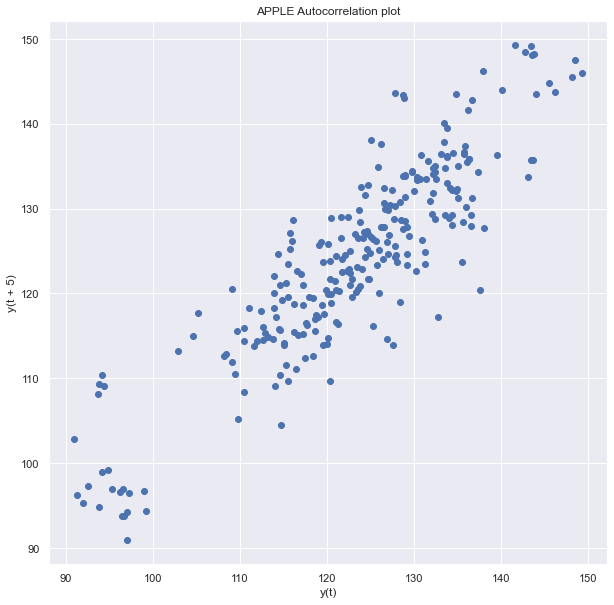

In [84]:
#correlation plot
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('APPLE Autocorrelation plot')

# Training and Testing Data

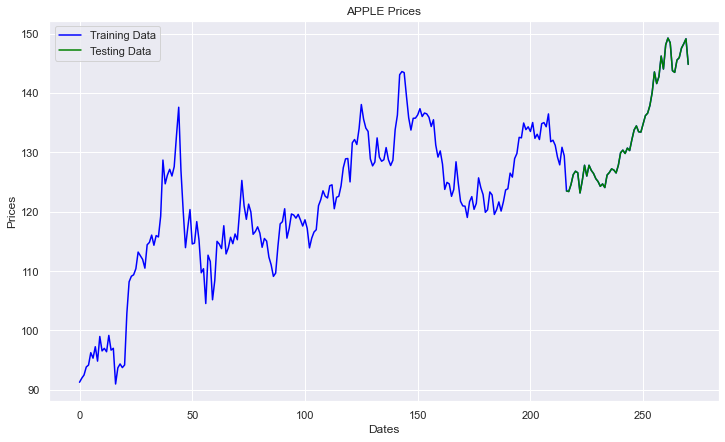

In [85]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('APPLE Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.legend()

In [86]:
df = df[["Close"]]
print(df.head())

       Close
0  91.027496
1  91.027496
2  93.462502
3  93.172501
4  95.342499


In [87]:
#rolling mean of the datavalues
df['S_3'] = df['Close'].shift(1).rolling(window=3).mean() 
df['S_9']= df['Close'].shift(1).rolling(window=9).mean() 
df= df.dropna() 
X = df[['S_3','S_9']] 
X.head()

,S_3,S_9
9,96.151667,94.248889
10,96.753334,94.993056
11,97.101667,95.603611
12,96.858332,95.921944
13,97.069165,96.498055


In [88]:
y = df['Close']
y.head()

9     97.724998
10    96.522499
11    96.327499
12    98.357498
13    97.000000
Name: Close, dtype: float64

In [89]:
#setting the futuredays to predict
futureDays = 12

In [90]:
df["Prediction"] = df[["Close"]].shift(-futureDays)
print(df.head())
print(df.tail())

        Close        S_3        S_9  Prediction
9   97.724998  96.151667  94.248889  106.260002
10  96.522499  96.753334  94.993056  108.937500
11  96.327499  97.101667  95.603611  109.665001
12  98.357498  96.858332  95.921944  110.062500
13  97.000000  97.069165  96.498055  113.902496
          Close         S_3         S_9  Prediction
266  146.800003  144.666662  145.918886         NaN
267  148.559998  146.116664  146.106664         NaN
268  148.990005  146.919998  146.557775         NaN
269  146.770004  148.116669  146.929998         NaN
270  144.979996  148.106669  146.665554         NaN


In [91]:
x = np.array(df.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[ 97.724998    96.15166733  94.24888867]
 [ 96.522499    96.753334    94.99305556]
 [ 96.327499    97.10166667  95.60361144]
 [ 98.357498    96.858332    95.92194444]
 [ 97.          97.06916533  96.49805522]
 [ 97.272499    97.22833233  96.682222  ]
 [ 92.845001    97.54333233  96.85111056]
 [ 92.614998    95.70583333  96.50944422]
 [ 94.809998    94.244166    96.19138833]
 [ 93.252502    93.42333233  95.94166556]
 [ 95.040001    93.559166    95.44472156]
 [ 96.190002    94.36750033  95.27999956]
 [106.260002    94.82750167  95.26472211]
 [108.9375      99.163335    96.14277811]
 [109.665001   103.79583467  97.469167  ]
 [110.0625     108.287501    98.84611167]
 [113.902496   109.55500033 100.75916711]
 [111.112503   111.209999   103.12444467]
 [112.727501   111.69249967 104.93583411]
 [109.375      112.58083333 107.09972289]
 [113.010002   111.071668   108.69250056]
 [115.010002   111.70416767 110.56138944]
 [114.907501   112.46500133 111.53361167]
 [114.607498   114.30916833 112.19

In [92]:
y = np.array(df["Prediction"])[:-futureDays]
print(y)

[106.260002 108.9375   109.665001 110.0625   113.902496 111.112503
 112.727501 109.375    113.010002 115.010002 114.907501 114.607498
 115.5625   115.707497 118.275002 124.370003 125.857498 124.824997
 126.522499 125.010002 124.807503 129.039993 134.179993 131.399994
 120.879997 120.959999 112.82     117.32     113.489998 112.
 115.360001 115.540001 112.129997 110.339996 106.839996 110.080002
 111.809998 107.120003 108.220001 112.279999 114.959999 114.089996
 115.809998 116.790001 113.019997 116.5      113.160004 115.080002
 114.970001 116.970001 124.400002 121.099998 121.190002 120.709999
 119.019997 115.980003 117.510002 116.870003 115.75     115.040001
 115.050003 116.599998 111.199997 115.32     108.860001 108.769997
 110.440002 114.949997 119.029999 118.690002 116.32     115.970001
 119.489998 119.209999 119.260002 120.300003 119.389999 118.029999
 118.639999 117.339996 113.849998 115.169998 116.029999 116.589996
 119.050003 122.720001 123.080002 122.940002 122.25     123.75
 124.

In [95]:
xfuture = df.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[133.410004   133.32666533 131.09444256]
 [133.110001   133.69666567 131.76777656]
 [134.779999   133.40666733 132.05999933]
 [136.330002   133.766668   132.63111044]
 [136.960007   134.74000067 133.317778  ]
 [137.270004   136.023336   133.892224  ]
 [139.960007   136.85333767 134.64889033]
 [142.020004   138.06333933 135.50000189]
 [144.570007   139.750005   136.39333611]
 [143.240005   142.18333933 137.601115  ]
 [145.110001   143.276672   138.69333733]
 [144.5        144.306671   140.02667067]]


# Linear Regression

In [93]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [94]:
# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [96]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [131.67863119 131.41605568 132.6030992  133.64991743 134.00092746
 134.10892783 135.92022826 137.2572469  138.90521164 137.75286909
 138.95491402 138.40308731]


### LR Prediction Graph

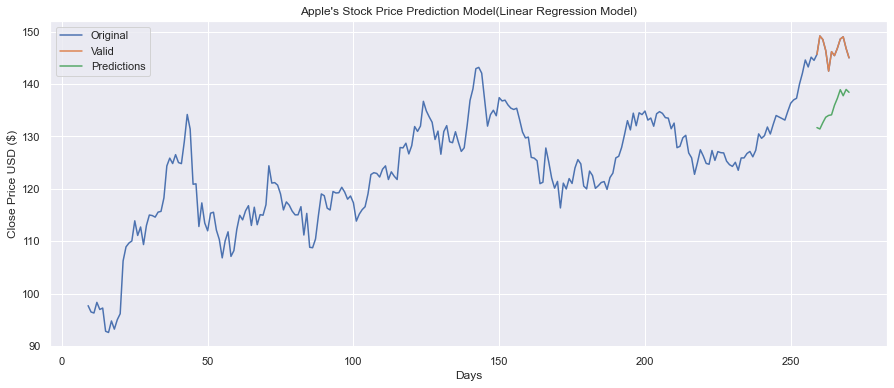

In [101]:
predictions = linearPrediction
valid = df[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(15, 6))
plt.title("Apple's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

# Decision Tree Regression

In [98]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

In [99]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [145.639999 149.149994 128.100006 127.849998 142.449997 146.149994
 145.399994 145.399994 148.559998 135.369995 146.770004 144.979996]


### Decision Tree Prediction Graph

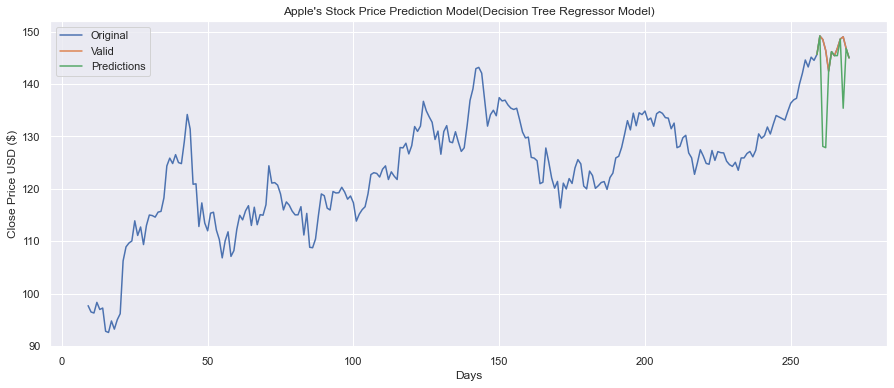

In [100]:
predictions = treePrediction
valid = df[x.shape[0]:]
valid["Predictions"] = predictions
plt.figure(figsize=(15, 6))
plt.title("Apple's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(df["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()